In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [15,10] #Adjusts the configuration of the plots we will create
pd.set_option('display.max_rows', 20)

In [2]:
#load the data
data = pd.read_csv('video_games_sales.csv')

In [3]:
data.head()

Name Platform  Year_of_Release     Genre Publisher  \
0             Wii Sports      Wii           2006.0    Sports  Nintendo   
1         Mario Kart Wii      Wii           2008.0    Racing  Nintendo   
2      Wii Sports Resort      Wii           2009.0    Sports  Nintendo   
3  New Super Mario Bros.       DS           2006.0  Platform  Nintendo   
4               Wii Play      Wii           2006.0      Misc  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53            76   
1     15.68     12.76      3.79         3.29         35.52            82   
2     15.61     10.93      3.28         2.95         32.77            80   
3     11.28      9.14      6.50         2.88         29.80            89   
4     13.96      9.18      2.93         2.84         28.92            58   

   Critic_Count  User_Score  User_Count Developer Rating  
0            51         8.0         322  Nintendo      E  
1            73         8.3         709  Nintendo      E  
2            73         8.0         192  Nintendo      E  
3            65         8.5         431  Nintendo      E  
4            41         6.6         129  Nintendo      E

In [4]:
#Finding out mising data if there are ny

for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

Name - 0.0%
Platform - 0.0%
Year_of_Release - 0.017683970336565887%
Genre - 0.0%
Publisher - 0.0005704506560182544%
NA_Sales - 0.0%
EU_Sales - 0.0%
JP_Sales - 0.0%
Other_Sales - 0.0%
Global_Sales - 0.0%
Critic_Score - 0.0%
Critic_Count - 0.0%
User_Score - 0.0%
User_Count - 0.0%
Developer - 0.0%
Rating - 0.0%


In [5]:
#exploring data
data.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score         int64
Critic_Count         int64
User_Score         float64
User_Count           int64
Developer           object
Rating              object
dtype: object

In [6]:
# Creating correct year column
data['year'] = data['Year_of_Release'].astype('str').str[:4]
data['Critic_Score'] = data['Critic_Score'].astype('float64')

In [7]:
data['Critic_Score'] = data['Critic_Score']/10

In [8]:
data.head()

Name Platform  Year_of_Release     Genre Publisher  \
0             Wii Sports      Wii           2006.0    Sports  Nintendo   
1         Mario Kart Wii      Wii           2008.0    Racing  Nintendo   
2      Wii Sports Resort      Wii           2009.0    Sports  Nintendo   
3  New Super Mario Bros.       DS           2006.0  Platform  Nintendo   
4               Wii Play      Wii           2006.0      Misc  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53           7.6   
1     15.68     12.76      3.79         3.29         35.52           8.2   
2     15.61     10.93      3.28         2.95         32.77           8.0   
3     11.28      9.14      6.50         2.88         29.80           8.9   
4     13.96      9.18      2.93         2.84         28.92           5.8   

   Critic_Count  User_Score  User_Count Developer Rating  year  
0            51         8.0         322  Nintendo      E  2006  
1            73         8.3         709  Nintendo      E  2008  
2            73         8.0         192  Nintendo      E  2009  
3            65         8.5         431  Nintendo      E  2006  
4            41         6.6         129  Nintendo      E  2006

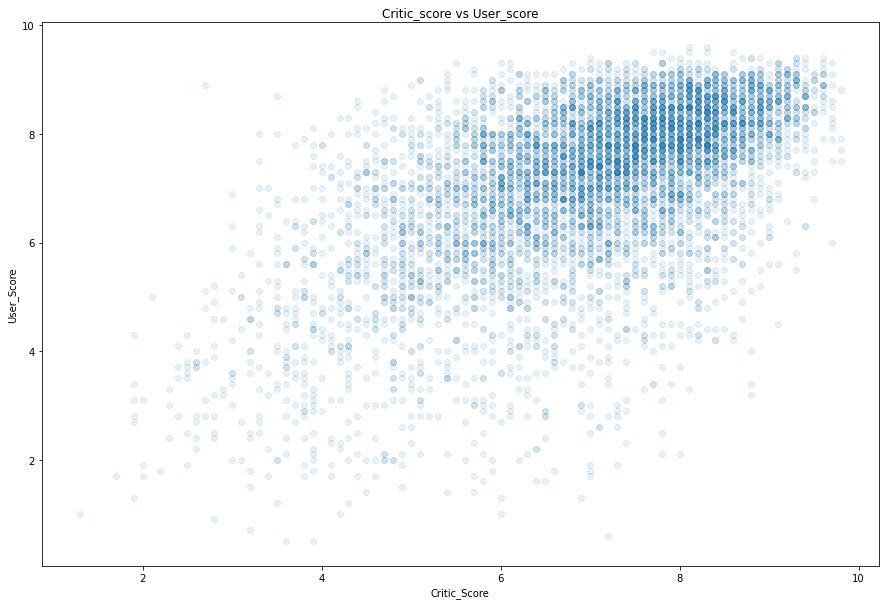

In [9]:
#Scatter plot critic_score vs user_score

plt.scatter(x=data['Critic_Score'], y = data['User_Score'],alpha=0.1)
plt.title('Critic_score vs User_score')

plt.xlabel('Critic_Score')

plt.ylabel('User_Score')

plt.show()

#with alpha parameter we can observe data better

<AxesSubplot:xlabel='Global_Sales', ylabel='User_Score'>

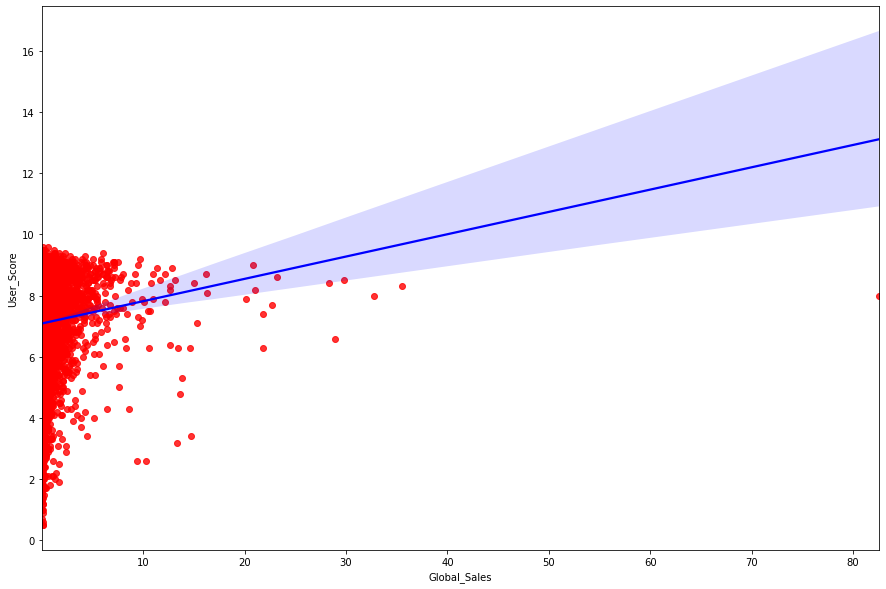

In [10]:
sns.regplot(x='Global_Sales', y='User_Score', data=data, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

In pandas correlation matrix have 3 method, since we are going to use Linear Regression on numerical values default version of `corr` function(pearson) will be enough for us

Click on the box to learn more about other methods!
<table align="left">
  <td>
    <a target="_blank" href="https://realpython.com/numpy-scipy-pandas-correlation-python/"><img width="35"src="https://files.realpython.com/media/real-python-logo-square.28474fda9228.png" /></a>
  </td>
</table>

In [11]:
data.corr(method='pearson')

Year_of_Release  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Year_of_Release         1.000000 -0.016535  0.042014 -0.037411     0.043356   
NA_Sales               -0.016535  1.000000  0.839946  0.467325     0.726546   
EU_Sales                0.042014  0.839946  1.000000  0.519459     0.716556   
JP_Sales               -0.037411  0.467325  0.519459  1.000000     0.394752   
Other_Sales             0.043356  0.726546  0.716556  0.394752     1.000000   
Global_Sales            0.007023  0.955467  0.938723  0.612781     0.804294   
Critic_Score           -0.004719  0.236397  0.213943  0.147254     0.192778   
Critic_Count            0.205473  0.284967  0.265904  0.169305     0.239650   
User_Score             -0.232153  0.093188  0.062094  0.127331     0.062748   
User_Count              0.195635  0.248019  0.283649  0.073261     0.239375   

                 Global_Sales  Critic_Score  Critic_Count  User_Score  \
Year_of_Release      0.007023     -0.004719      0.205473   -0.232153   
NA_Sales             0.955467      0.236397      0.284967    0.093188   
EU_Sales             0.938723      0.213943      0.265904    0.062094   
JP_Sales             0.612781      0.147254      0.169305    0.127331   
Other_Sales          0.804294      0.192778      0.239650    0.062748   
Global_Sales         1.000000      0.239508      0.291270    0.094900   
Critic_Score         0.239508      1.000000      0.399011    0.579090   
Critic_Count         0.291270      0.399011      1.000000    0.211103   
User_Score           0.094900      0.579090      0.211103    1.000000   
User_Count           0.265194      0.265093      0.362903    0.024100   

                 User_Count  
Year_of_Release    0.195635  
NA_Sales           0.248019  
EU_Sales           0.283649  
JP_Sales           0.073261  
Other_Sales        0.239375  
Global_Sales       0.265194  
Critic_Score       0.265093  
Critic_Count       0.362903  
User_Score         0.024100  
User_Count         1.000000

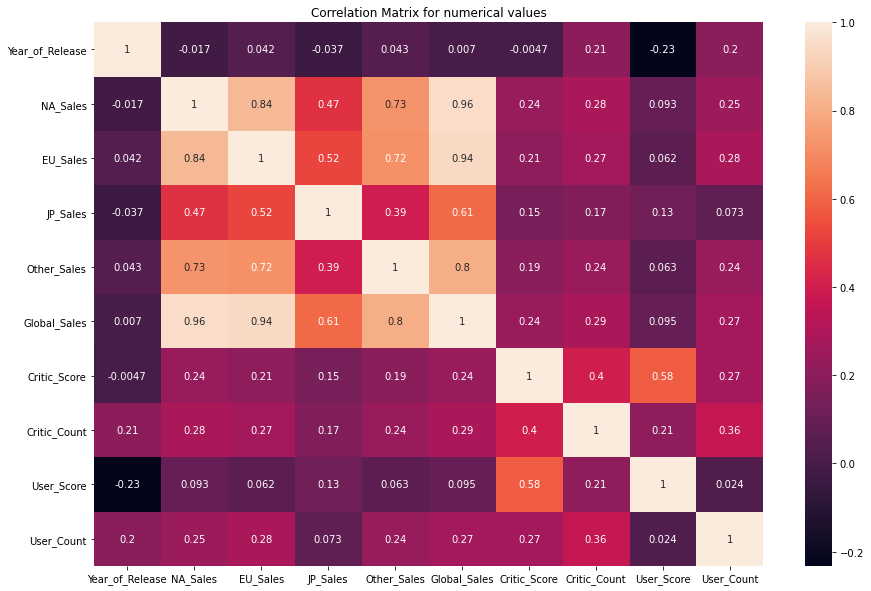

In [12]:
corr_matrix = data.corr() 
sns.heatmap(corr_matrix, annot=True)

plt.title('Correlation Matrix for numerical values')

plt.show()

# Correlation for Categorical values 

Since corr function works only when data type is numerical, we will change our categorical columns to numerical, to see if there are correlation between them.

In [13]:
changed_df = data.copy()

for col_name in changed_df.columns:
    if (changed_df[col_name].dtype == 'object'):
        changed_df[col_name] = changed_df[col_name].astype('category')
        changed_df[col_name] = changed_df[col_name].cat.codes
    
changed_df.head()

Name  Platform  Year_of_Release  Genre  Publisher  NA_Sales  EU_Sales  \
0  4303        13           2006.0     10        160     41.36     28.96   
1  2130        13           2008.0      6        160     15.68     12.76   
2  4305        13           2009.0     10        160     15.61     10.93   
3  2614         2           2006.0      4        160     11.28      9.14   
4  4301        13           2006.0      3        160     13.96      9.18   

   JP_Sales  Other_Sales  Global_Sales  Critic_Score  Critic_Count  \
0      3.77         8.45         82.53           7.6            51   
1      3.79         3.29         35.52           8.2            73   
2      3.28         2.95         32.77           8.0            73   
3      6.50         2.88         29.80           8.9            65   
4      2.93         2.84         28.92           5.8            41   

   User_Score  User_Count  Developer  Rating  year  
0         8.0         322        786       1    14  
1         8.3         709        786       1    16  
2         8.0         192        786       1    17  
3         8.5         431        786       1    14  
4         6.6         129        786       1    14

In [14]:
data.head()

Name Platform  Year_of_Release     Genre Publisher  \
0             Wii Sports      Wii           2006.0    Sports  Nintendo   
1         Mario Kart Wii      Wii           2008.0    Racing  Nintendo   
2      Wii Sports Resort      Wii           2009.0    Sports  Nintendo   
3  New Super Mario Bros.       DS           2006.0  Platform  Nintendo   
4               Wii Play      Wii           2006.0      Misc  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53           7.6   
1     15.68     12.76      3.79         3.29         35.52           8.2   
2     15.61     10.93      3.28         2.95         32.77           8.0   
3     11.28      9.14      6.50         2.88         29.80           8.9   
4     13.96      9.18      2.93         2.84         28.92           5.8   

   Critic_Count  User_Score  User_Count Developer Rating  year  
0            51         8.0         322  Nintendo      E  2006  
1            73         8.3         709  Nintendo      E  2008  
2            73         8.0         192  Nintendo      E  2009  
3            65         8.5         431  Nintendo      E  2006  
4            41         6.6         129  Nintendo      E  2006

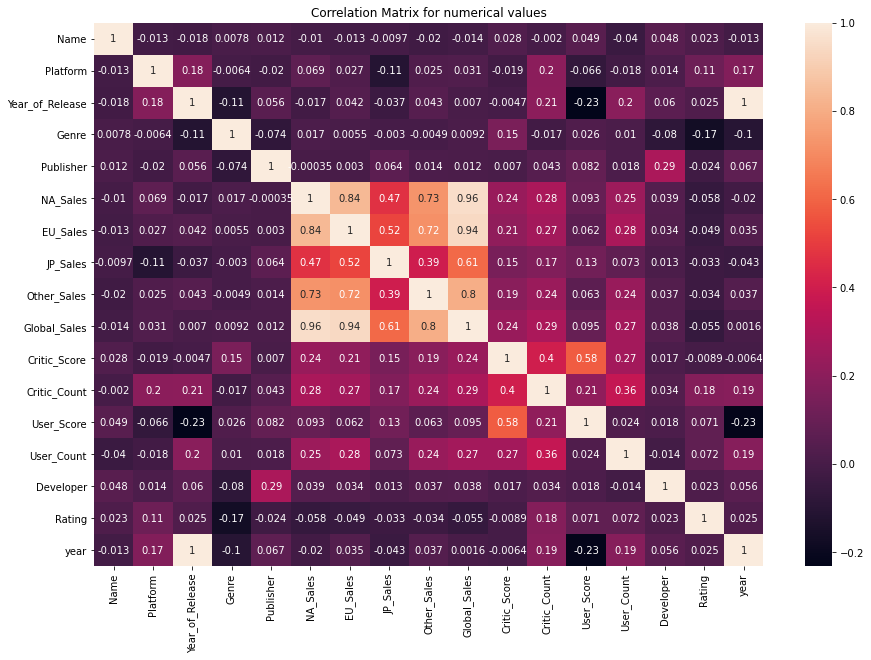

In [15]:
corr_matrix_all = changed_df.corr() #pearson, kendall, spearman
sns.heatmap(corr_matrix_all, annot=True)

plt.title('Correlation Matrix for numerical values')

plt.show()

In [16]:
changed_df.corr()

Name  Platform  Year_of_Release     Genre  Publisher  \
Name             1.000000 -0.012884        -0.018150  0.007830   0.012130   
Platform        -0.012884  1.000000         0.179930 -0.006386  -0.020273   
Year_of_Release -0.018150  0.179930         1.000000 -0.111999   0.055641   
Genre            0.007830 -0.006386        -0.111999  1.000000  -0.074180   
Publisher        0.012130 -0.020273         0.055641 -0.074180   1.000000   
NA_Sales        -0.010375  0.068963        -0.016535  0.017088  -0.000348   
EU_Sales        -0.012779  0.027328         0.042014  0.005512   0.003046   
JP_Sales        -0.009740 -0.110304        -0.037411 -0.002997   0.064383   
Other_Sales     -0.020469  0.024739         0.043356 -0.004923   0.013614   
Global_Sales    -0.013773  0.030838         0.007023  0.009235   0.012133   
Critic_Score     0.028039 -0.018702        -0.004719  0.148647   0.006962   
Critic_Count    -0.001998  0.198406         0.205473 -0.016855   0.043490   
User_Score       0.049356 -0.066125        -0.232153  0.025940   0.081532   
User_Count      -0.040243 -0.018188         0.195635  0.010025   0.017954   
Developer        0.047679  0.014298         0.060492 -0.079895   0.291271   
Rating           0.022808  0.112125         0.025229 -0.173537  -0.023608   
year            -0.012976  0.174002         0.999662 -0.104020   0.067308   

                 NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
Name            -0.010375 -0.012779 -0.009740    -0.020469     -0.013773   
Platform         0.068963  0.027328 -0.110304     0.024739      0.030838   
Year_of_Release -0.016535  0.042014 -0.037411     0.043356      0.007023   
Genre            0.017088  0.005512 -0.002997    -0.004923      0.009235   
Publisher       -0.000348  0.003046  0.064383     0.013614      0.012133   
NA_Sales         1.000000  0.839946  0.467325     0.726546      0.955467   
EU_Sales         0.839946  1.000000  0.519459     0.716556      0.938723   
JP_Sales         0.467325  0.519459  1.000000     0.394752      0.612781   
Other_Sales      0.726546  0.716556  0.394752     1.000000      0.804294   
Global_Sales     0.955467  0.938723  0.612781     0.804294      1.000000   
Critic_Score     0.236397  0.213943  0.147254     0.192778      0.239508   
Critic_Count     0.284967  0.265904  0.169305     0.239650      0.291270   
User_Score       0.093188  0.062094  0.127331     0.062748      0.094900   
User_Count       0.248019  0.283649  0.073261     0.239375      0.265194   
Developer        0.038770  0.034031  0.012520     0.037083      0.037965   
Rating          -0.057960 -0.049042 -0.033485    -0.033513     -0.055241   
year            -0.019554  0.035493 -0.042910     0.037425      0.001632   

                 Critic_Score  Critic_Count  User_Score  User_Count  \
Name                 0.028039     -0.001998    0.049356   -0.040243   
Platform            -0.018702      0.198406   -0.066125   -0.018188   
Year_of_Release     -0.004719      0.205473   -0.232153    0.195635   
Genre                0.148647     -0.016855    0.025940    0.010025   
Publisher            0.006962      0.043490    0.081532    0.017954   
NA_Sales             0.236397      0.284967    0.093188    0.248019   
EU_Sales             0.213943      0.265904    0.062094    0.283649   
JP_Sales             0.147254      0.169305    0.127331    0.073261   
Other_Sales          0.192778      0.239650    0.062748    0.239375   
Global_Sales         0.239508      0.291270    0.094900    0.265194   
Critic_Score         1.000000      0.399011    0.579090    0.265093   
Critic_Count         0.399011      1.000000    0.211103    0.362903   
User_Score           0.579090      0.211103    1.000000    0.024100   
User_Count           0.265093      0.362903    0.024100    1.000000   
Developer            0.016898      0.033596    0.017665   -0.014040   
Rating              -0.008890      0.179681    0.071157    0.071942   
year                -0.006397      0.188721   -0.225077   

In [17]:
pd.set_option('display.max_rows', None)


It is hard to look at all those numbers, so we can use `unstack` and then filter out to look correlations which are higher then 0.5


In [18]:
cm = changed_df.corr()
corr_pairs = cm.unstack()
sorted_pairs = corr_pairs.sort_values()

In [19]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

EU_Sales         JP_Sales           0.519459
JP_Sales         EU_Sales           0.519459
Critic_Score     User_Score         0.579090
User_Score       Critic_Score       0.579090
Global_Sales     JP_Sales           0.612781
JP_Sales         Global_Sales       0.612781
EU_Sales         Other_Sales        0.716556
Other_Sales      EU_Sales           0.716556
NA_Sales         Other_Sales        0.726546
Other_Sales      NA_Sales           0.726546
                 Global_Sales       0.804294
Global_Sales     Other_Sales        0.804294
EU_Sales         NA_Sales           0.839946
NA_Sales         EU_Sales           0.839946
Global_Sales     EU_Sales           0.938723
EU_Sales         Global_Sales       0.938723
NA_Sales         Global_Sales       0.955467
Global_Sales     NA_Sales           0.955467
year             Year_of_Release    0.999662
Year_of_Release  year               0.999662
Name             Name               1.000000
Other_Sales      Other_Sales        1.000000
Developer 

C:\Users\User\anaconda3\envs\Analysis\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


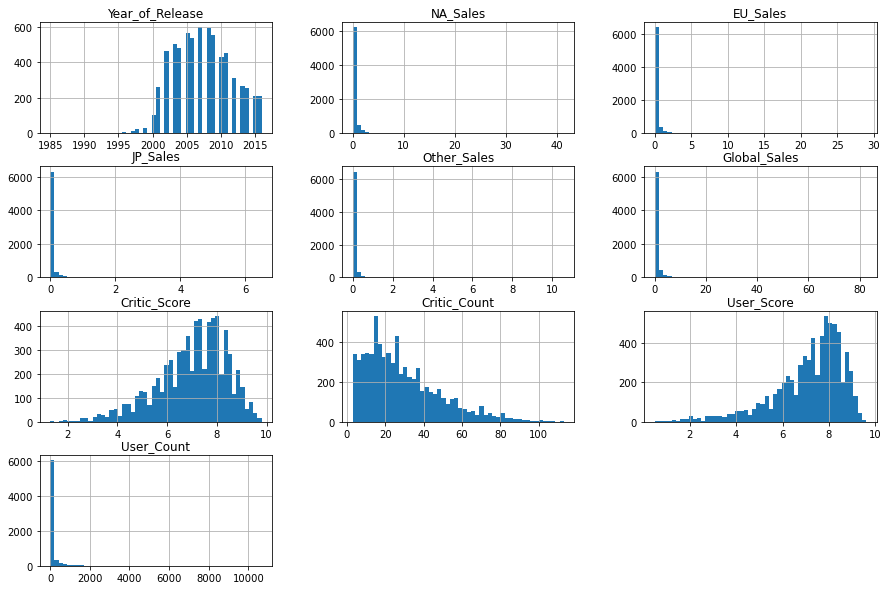

In [20]:
data.hist(bins=50, figsize=(15,10))
plt.show()

In [21]:
data['Rating'].unique()

array(['E', 'M', 'T', 'E10+', 'AO', 'K-A', 'RP'], dtype=object)

In [22]:
data.loc[(data['Rating'] == 'AO')]


Name Platform  Year_of_Release   Genre  \
586  Grand Theft Auto: San Andreas       XB           2005.0  Action   

                Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
586  Take-Two Interactive      1.26      0.61       0.0         0.09   

     Global_Sales  Critic_Score  Critic_Count  User_Score  User_Count  \
586          1.95           9.3            58         8.6         118   

          Developer Rating  year  
586  Rockstar North     AO  2005

K_A(kids to adult) and E(everyone) is same thing with different names, I'm going to keep only one of them

In [23]:
data['Rating'] = data['Rating'].replace({'K_A':'E'})


In [24]:
data['Global_Sales'].value_counts()

0.02     248
0.03     188
0.05     177
0.04     167
0.06     166
0.08     165
0.07     159
0.09     156
0.11     152
0.10     145
0.14     133
0.15     125
0.13     124
0.12     121
0.19     120
0.01     118
0.17     109
0.21     105
0.18     100
0.20      94
0.16      93
0.24      87
0.23      79
0.29      78
0.22      75
0.25      75
0.32      74
0.27      70
0.28      69
0.26      68
0.33      61
0.42      57
0.31      54
0.39      51
0.37      50
0.30      50
0.35      49
0.34      47
0.38      47
0.47      46
0.40      45
0.41      45
0.56      44
0.36      44
0.44      44
0.43      44
0.45      43
0.53      42
0.52      41
0.50      40
0.54      39
0.57      39
0.51      38
0.58      37
0.49      36
0.61      35
0.46      33
0.55      31
0.64      30
0.63      30
0.66      29
0.72      29
0.60      29
0.48      28
0.70      27
0.75      25
0.59      24
0.93      23
0.87      23
0.62      23
0.90      23
0.79      23
0.65      22
0.73      22
0.74      22
0.71      20
1.27      20

C:\Users\User\anaconda3\envs\Analysis\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


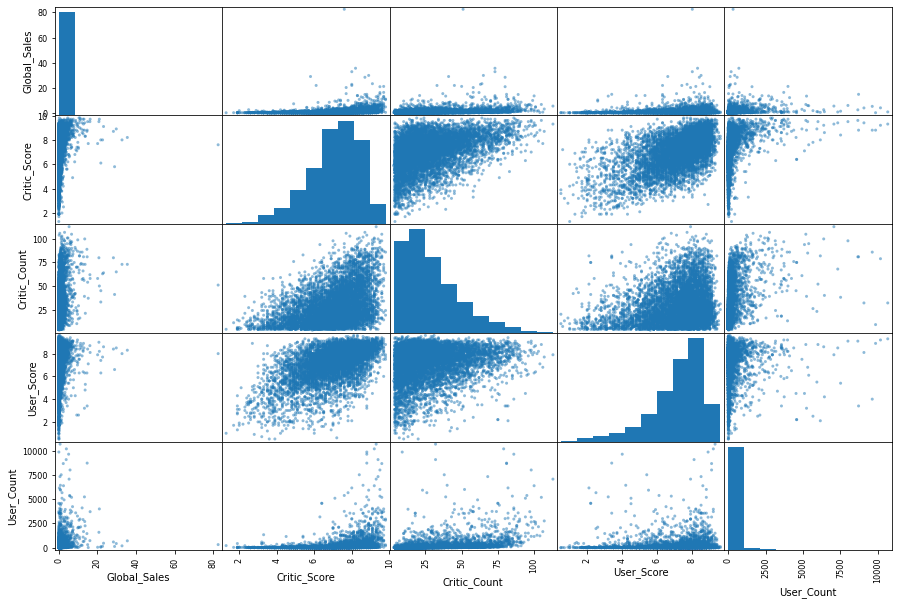

In [25]:
from pandas.plotting import scatter_matrix

attributes = ['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score',
             'User_Count']
scatter_matrix(data[attributes], figsize=(15,10))
plt.show()

<AxesSubplot:>

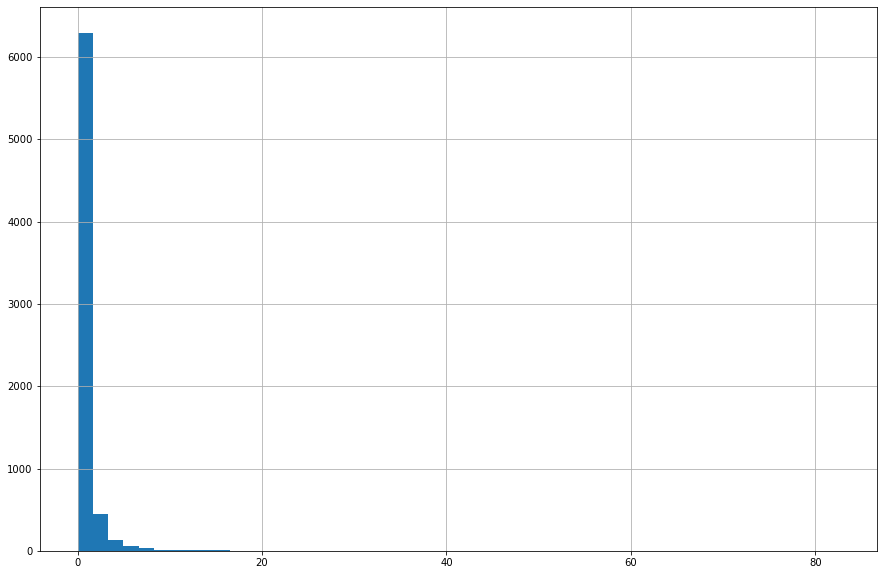

In [26]:
data['Global_Sales'].hist(bins=50)

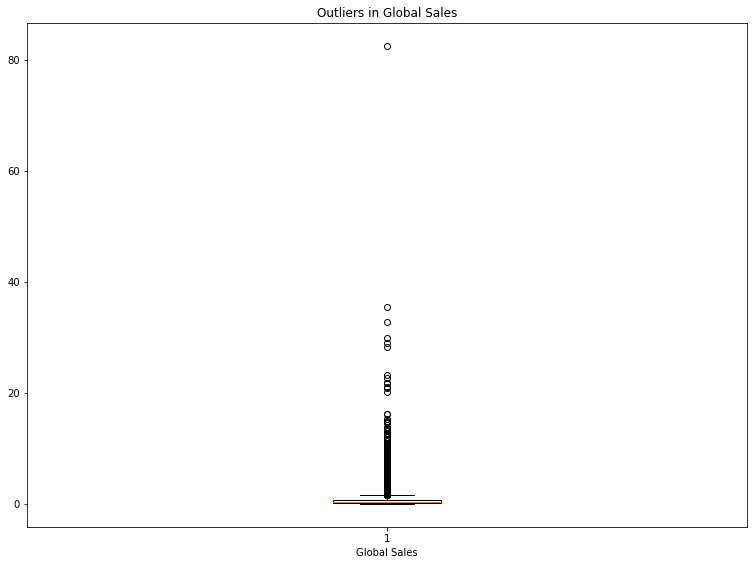

In [27]:
fig = plt.figure(figsize=(10,7))

ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('Global Sales')

bp = ax.boxplot(data['Global_Sales'])
plt.title('Outliers in Global Sales')
plt.show()





Our inital boxplot showed us that there are some outliers that could reduce our model accuracy, so have to  deal with them first
Note: We can use plotly to get more information out of graphics

Out of 7000+ entry there are only 12 games  have higher Global_sales than 20. Since number is small I'm going to delete them

In [28]:
data.loc[(data["Global_Sales"] > 20)]

Name Platform  Year_of_Release  \
0                                     Wii Sports      Wii           2006.0   
1                                 Mario Kart Wii      Wii           2008.0   
2                              Wii Sports Resort      Wii           2009.0   
3                          New Super Mario Bros.       DS           2006.0   
4                                       Wii Play      Wii           2006.0   
5                      New Super Mario Bros. Wii      Wii           2009.0   
6                                  Mario Kart DS       DS           2005.0   
7                                        Wii Fit      Wii           2007.0   
8                             Kinect Adventures!     X360           2010.0   
9                                   Wii Fit Plus      Wii           2009.0   
10                            Grand Theft Auto V      PS3           2013.0   
11                 Grand Theft Auto: San Andreas      PS2           2004.0   
12  Brain Age: Train Your Brain in Minutes a Day       DS           2005.0   

       Genre               Publisher  NA_Sales  EU_Sales  JP_Sales  \
0     Sports                Nintendo     41.36     28.96      3.77   
1     Racing                Nintendo     15.68     12.76      3.79   
2     Sports                Nintendo     15.61     10.93      3.28   
3   Platform                Nintendo     11.28      9.14      6.50   
4       Misc                Nintendo     13.96      9.18      2.93   
5   Platform                Nintendo     14.44      6.94      4.70   
6     Racing                Nintendo      9.71      7.47      4.13   
7     Sports                Nintendo      8.92      8.03      3.60   
8       Misc  Microsoft Game Studios     15.00      4.89      0.24   
9     Sports                Nintendo      9.01      8.49      2.53   
10    Action    Take-Two Interactive      7.02      9.09      0.98   
11    Action    Take-Two Interactive      9.43      0.40      0.41   
12      Misc                Nintendo      4.74      9.20      4.16   

    Other_Sales  Global_Sales  Critic_Score  Critic_Count  User_Score  \
0          8.45         82.53           7.6            51         8.0   
1          3.29         35.52           8.2            73         8.3   
2          2.95         32.77           8.0            73         8.0   
3          2.88         29.80           8.9            65         8.5   
4          2.84         28.92           5.8            41         6.6   
5          2.24         28.32           8.7            80         8.4   
6          1.90         23.21           9.1            64         8.6   
7          2.15         22.70           8.0            63         7.7   
8          1.69         21.81           6.1            45         6.3   
9          1.77         21.79           8.0            33         7.4   
10         3.96         21.04           9.7            50         8.2   
11        10.57         20.81           9.5            80         9.0   
12         2.04         20.15           7.7            58         7.9   

    User_Count            Developer Rating  year  
0          322             Nintendo      E  2006  
1          709             Nintendo      E  2008  
2          192             Nintendo      E  2009  
3          431             Nintendo      E  2006  
4          129             Nintendo      E  2006  
5          594             Nintendo      E  2009  
6          464             Nintendo      E  2005  
7          146             Nintendo      E  2007  
8          106  Good Science Studio      E  2010  
9           52             Nintendo      E  2009  
10        3994       Rockstar North      M  2013  
11        1588       Rockstar North      M  2004  
12          50             Nintendo      E  2005

In [29]:
data = data.drop(data[data.Global_Sales > 20].index)
data.head()

Name Platform  Year_of_Release  \
13                           Grand Theft Auto V     X360           2013.0   
14                  Grand Theft Auto: Vice City      PS2           2002.0   
15  Brain Age 2: More Training in Minutes a Day       DS           2005.0   
16                       Gran Turismo 3: A-Spec      PS2           2001.0   
17               Call of Duty: Modern Warfare 3     X360           2011.0   

      Genre                    Publisher  NA_Sales  EU_Sales  JP_Sales  \
13   Action         Take-Two Interactive      9.66      5.14      0.06   
14   Action         Take-Two Interactive      8.41      5.49      0.47   
15   Puzzle                     Nintendo      3.43      5.35      5.32   
16   Racing  Sony Computer Entertainment      6.85      5.09      1.87   
17  Shooter                   Activision      9.04      4.24      0.13   

    Other_Sales  Global_Sales  Critic_Score  Critic_Count  User_Score  \
13         1.41         16.27           9.7            58         8.1   
14         1.78         16.15           9.5            62         8.7   
15         1.18         15.29           7.7            37         7.1   
16         1.16         14.98           9.5            54         8.4   
17         1.32         14.73           8.8            81         3.4   

    User_Count                          Developer Rating  year  
13        3711                     Rockstar North      M  2013  
14         730                     Rockstar North      M  2002  
15          19                           Nintendo      E  2005  
16         314                  Polyphony Digital      E  2001  
17        8713  Infinity Ward, Sledgehammer Games      M  2011

In [30]:
import plotly.express as px
import plotly.graph_objects as go

x_val = data['Critic_Score']

y_val = data['Global_Sales']
plot = px.violin(data_frame=data, y=y_val, x=x_val)
plot.show()

In [31]:
X = data[['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count' ]]
y = data[['Global_Sales']]

In [41]:
#Splitting dataset with 80/20 ratio
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [33]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = regressor.fit(X_train, y_train)

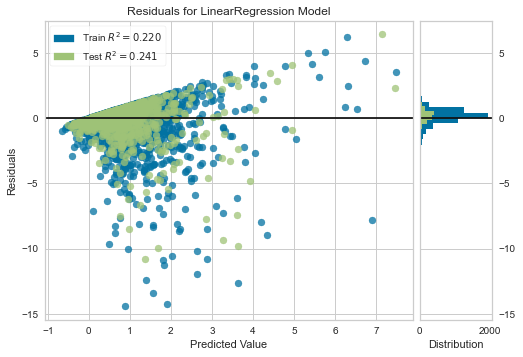

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [42]:
#we can check our model residual plot as well. 
from yellowbrick.regressor import ResidualsPlot

res_plot = ResidualsPlot(regressor)
res_plot.fit(X_train, y_train)
res_plot.score(X_test, y_test)
res_plot.show()

`R squared` showed in residial plot is norm of residial. Closer to the 0 better the model. 

<a target="_blank" href="https://en.wikipedia.org/wiki/Coefficient_of_determination#Comparison_with_norm_of_residuals"> CLick here for further information</a>

In [35]:
#predicting test results
y_pred = regressor.predict(X_test)

In [36]:
from sklearn.metrics import mean_squared_error
sale_predictions = regressor.predict(X_test)
lin_mse = mean_squared_error(y_test, sale_predictions)
lin_rmse = np.sqrt(lin_mse)
print("In our LinearRegression model's Root mean squared error is: ", lin_rmse)

In our LinearRegression model's Root mean squared error is:  1.158477183161974


I'm going to use another model for comparison purposes

In [37]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

forest_reg.fit(X_train, y_train)


<ipython-input-37-e0cb8fcfcecd>:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(random_state=42)

In [38]:
sale_predictions = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, sale_predictions)
forest_rmse = np.sqrt(forest_mse)
print("In our RandomFores model's Root mean squared error is: ", forest_mse)

In our RandomFores model's Root mean squared error is:  1.2270586584404781


Clearly Regression did better than Randomforest. Lastly we can use cross validation on RandomForest to see if our model can be better

In [39]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standart deviation:', scores.std())

In [40]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, X_test, y_test, 
                               scoring='neg_mean_squared_error',
                              cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

C:\Users\User\anaconda3\envs\Analysis\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\User\anaconda3\envs\Analysis\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\User\anaconda3\envs\Analysis\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\User\anaconda3\envs\Analysis\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), 

Scores: [0.8378213  0.75290045 1.05241899 1.32101106 0.94143046 1.16183259
 1.03570724 1.14814726 1.09309487 1.28413051]
Mean: 1.0628494730410873
Standart deviation: 0.1720159873981734


With Cross validation it is almost equal to LinearRegression model.